In [1]:
import torch

c:\Users\Wen2Tee5\Desktop\Postgraduate\torchPlayGround\torchEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

In [3]:
data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context = [raw_text[i - j - 1] for j in range(CONTEXT_SIZE)] + [raw_text[i + j + 1] for j in range(CONTEXT_SIZE)]
    target = raw_text[i]
    data.append((context, target))

In [4]:
vocab = set(raw_text)
vocab_size = len(vocab)
word_to_idx = {word:i for i, word in enumerate(vocab)}

In [5]:
word_to_idx

{'of': 0,
 'effect,': 1,
 'data.': 2,
 'are': 3,
 'directed': 4,
 'called': 5,
 'to': 6,
 'program.': 7,
 'computer': 8,
 'computational': 9,
 'inhabit': 10,
 'is': 11,
 'manipulate': 12,
 'As': 13,
 'In': 14,
 'evolution': 15,
 'the': 16,
 'rules': 17,
 'direct': 18,
 'we': 19,
 'conjure': 20,
 'with': 21,
 'The': 22,
 'spirits': 23,
 'People': 24,
 'create': 25,
 'spells.': 26,
 'computers.': 27,
 'other': 28,
 'about': 29,
 'beings': 30,
 'idea': 31,
 'things': 32,
 'by': 33,
 'they': 34,
 'a': 35,
 'We': 36,
 'abstract': 37,
 'process': 38,
 'study': 39,
 'process.': 40,
 'Computational': 41,
 'that': 42,
 'evolve,': 43,
 'pattern': 44,
 'programs': 45,
 'our': 46,
 'processes': 47,
 'processes.': 48}

In [6]:
class CBOW(torch.nn.Module):

    def __init__(self, vocab_size, embedding_size, context_size) -> None:
        super(CBOW, self).__init__()
        self.embeddinglayer = torch.nn.Embedding(vocab_size, embedding_size)
        self.linear1 = torch.nn.Linear(2 * context_size * embedding_size, 128)
        self.linaer2 = torch.nn.Linear(128, vocab_size)

    def forward(self, x):
        x = self.embeddinglayer(x).view(1, -1)
        x = self.linear1(torch.nn.functional.relu(x))
        x = self.linaer2(x)
        out = torch.nn.functional.log_softmax(x, dim=1)
        return out

In [7]:
cbow = CBOW(vocab_size=vocab_size, embedding_size=16, context_size=CONTEXT_SIZE)

In [8]:
losses = []

loss_fn = torch.nn.NLLLoss()
opt = torch.optim.SGD(cbow.parameters(), lr=1e-3)

In [9]:
for epoch in range(20):
    for x,y in data:
        cbow.zero_grad()
        x_tensor = torch.tensor([word_to_idx[i] for i in x], dtype=torch.long)
        pred = cbow(x_tensor)
        loss = loss_fn(pred, torch.tensor([word_to_idx[target]], dtype=torch.long))
        loss.backward()
        opt.step()
        losses.append(loss.item())

In [10]:
import matplotlib.pyplot as plt

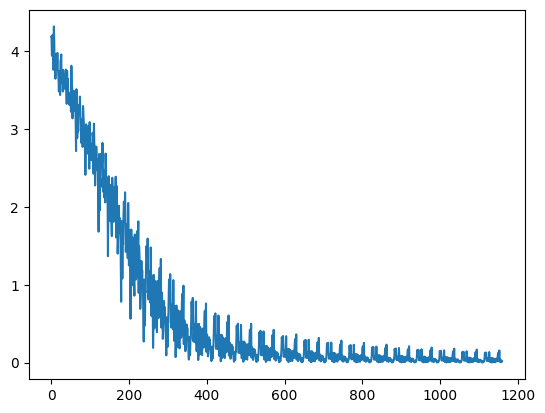

In [11]:
plt.plot(losses)
plt.show()